In [1]:
!git init
!git pull https://github.com/gmauricio-toledo/numerical-methods.git 

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 115 (delta 49), reused 57 (delta 17), pack-reused 0
Receiving objects: 100% (115/115), 1.20 MiB | 20.10 MiB/s, done.
Resolving deltas: 100% (49/49), done.
From https://github.com/gmauricio-toledo/numerical-methods
 * branch            HEAD       -> FETCH_HEAD


In [1]:
from interpolacion_aproximacion import RegresionLineal
import numpy as np

# Ejemplo 1: Regresión Lineal

In [2]:
datos = np.array([[0,2,4,6,9,11,12,15,17,19],[5,6,7,6,9,8,7,10,12,12]]).transpose()
print(datos)
datos.shape

[[ 0  5]
 [ 2  6]
 [ 4  7]
 [ 6  6]
 [ 9  9]
 [11  8]
 [12  7]
 [15 10]
 [17 12]
 [19 12]]


(10, 2)

Pendiente: 0.35246995994659547, Intercepto: 4.851535380507342


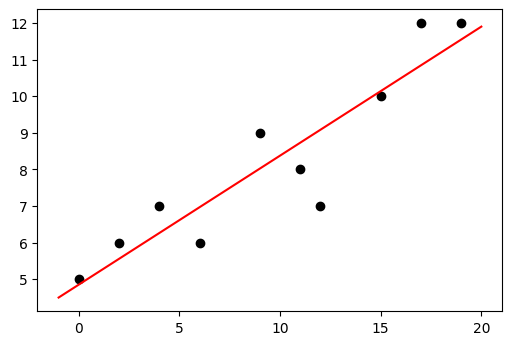

Error respecto al promedio: 55.599999999999994
Error cuadrático: 9.073965287049402
S_r<S_t : True
Desviación estandar de los datos y_i: 2.485513584307633
Error estandar de la estimación (s_yx): 1.065009699900041
S_yx<S_y : True
Coeficiente de determinación: 0.836799185484723


In [3]:
lr = RegresionLineal()
a_0, a_1 = lr.fit(datos)

lr.plot()
lr.metrics()


In [ ]:
from sklearn.linear_model import LinearRegression

lr_sl = LinearRegression()




# Ejemplo 2: Regresión Lineal vs Regresión Polinomial

Datos:
[[-3.         10.16833364]
 [-2.          5.4961486 ]
 [-1.          1.56518177]
 [ 0.          1.30585849]
 [ 1.          2.34985952]
 [ 2.          3.51896818]]
Pendiente: -1.22700050960513, Intercepto: 3.4538914463589565

a_0=3.4538914463589565, a_1=-1.22700050960513


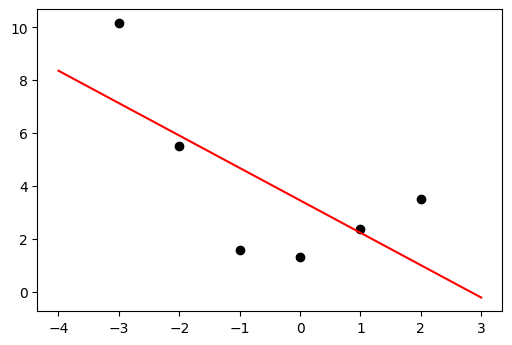

Error respecto al promedio: 56.40064415755608
Error cuadrático: 30.05386477255924
S_r < S_t : True
Desviación estandar de los datos y_i: 3.3585903042066945
Error estandar de la estimación (s_yx): 2.7410702641741618
S_yx < S_y : True
Coeficiente de determinación r2: 0.46713614318653346


In [6]:
n = 6
np.random.seed(77)
noise = np.random.normal(loc=0,scale=0.75,size=n)

xs = np.array(list(range(n)))-n//2
ys = np.array([1+x**2  for x in xs]) + noise
datos = np.vstack((xs,ys)).transpose()
print(f"Datos:\n{datos}")

lr = RegresionLineal()
lr.fit(datos)

print(f"\na_0={lr.a_0}, a_1={lr.a_1}")

lr.plot()
lr.metrics()



a_0=1.115494308793546, a_1=-0.3501015830181005, a_2=0.8768989265870295


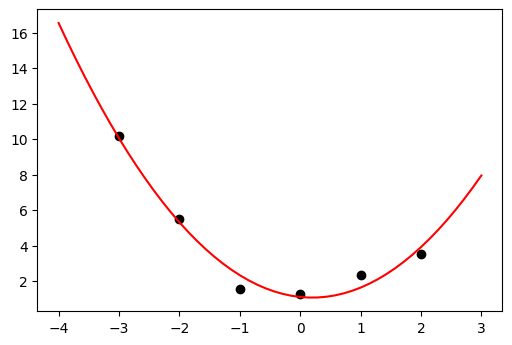

Error respecto al promedio: 56.40064415755608
Error cuadrático: 1.3463336144451568
S_r < S_t : True
Desviación estandar de los datos y_i: 3.3585903042066945
Error estandar de la estimación (s_yx): 0.6699088531148987
S_yx < S_y : True
Coeficiente de determinación r2: 0.9761291092583242


In [7]:
lr = RegresionLineal(grado=2)
lr.fit(datos)

print(f"\na_0={lr.a_0}, a_1={lr.a_1}, a_2={lr.a_2}")

lr.plot()
lr.metrics()

# Ejemplo 3:

Pendiente: -52.285714285714285, Intercepto: 1735.3333333333335
(1735.3333333333335, -52.285714285714285)


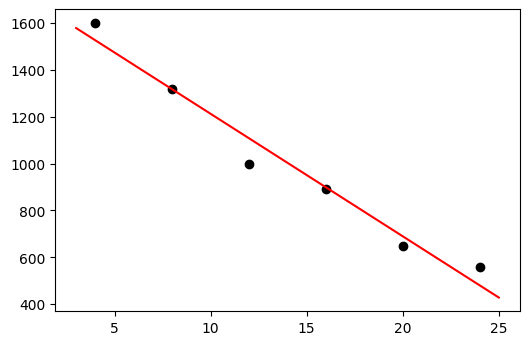

Error respecto al promedio: 790533.3333333334
Error cuadrático: 25070.476190476158
S_r < S_t : True
Desviación estandar de los datos y_i: 397.62629021062816
Error estandar de la estimación (s_yx): 79.16829572258733
S_yx < S_y : True
Coeficiente de determinación r2: 0.9682866298821772


In [1]:
import numpy as np
from interpolacion_aproximacion import RegresionLineal

X = np.transpose(np.array([[4,8,12,16,20,24],[1600,1320,1000,890,650,560]]))

lr = RegresionLineal(grado=1)
coefs = lr.fit(X)
print(coefs)

lr.plot()
lr.metrics()

In [9]:
lr.eval(15)

951.0476190476193

In [ ]:
xaxis = np.linspace(0,50,1000)

for x in xaxis:
    if abs(lr.eval(x)-200)<0.01:
        print(x,lr.eval(x))

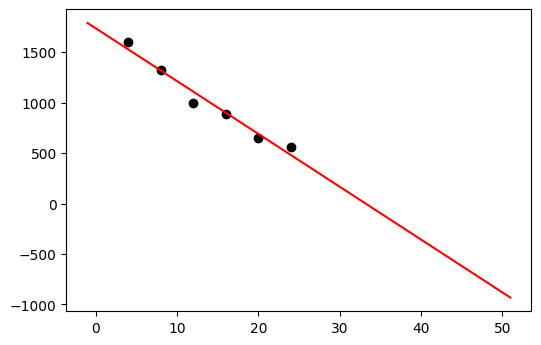

In [ ]:
import matplotlib.pyplot as plt

datos = X.copy()

# xmin, xmax = np.min(datos[0,:]), np.max(datos[0,:])
xmin = 0
xmax = 50
xaxis = np.linspace(xmin-1,xmax+1,num=50)
plt.figure(dpi=100)
plt.scatter(datos[0,:],datos[1,:],color='black')
plt.plot(xaxis,[lr.eval(x) for x in xaxis],color='red')
plt.show()

(1947.000000000011, -91.97321428571544, 1.417410714285733)


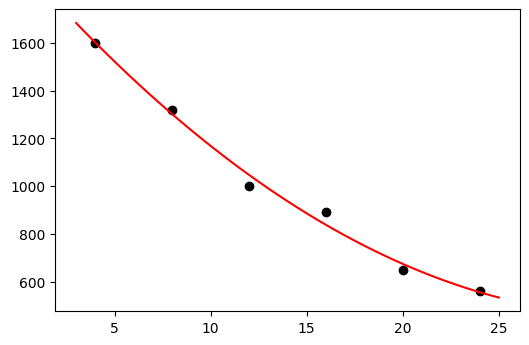

Error respecto al promedio: 790533.3333333334
Error cuadrático: 5869.285714285726
S_r<S_t : True
Desviación estandar de los datos y_i: 397.62629021062816
Error estandar de la estimación: 44.23153367710162
S_r<S_t : True
Coeficiente de determinación: 0.9925755367081898


In [ ]:
X = np.array([[4,8,12,16,20,24],[1600,1320,1000,890,650,560]])

lr2 = RegresionLineal(grado=2)
coefs = lr2.fit(X)
print(coefs)

lr2.plot()
lr2.metrics()

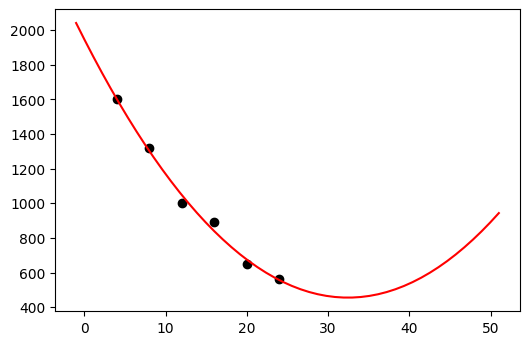

In [ ]:
import matplotlib.pyplot as plt

datos = X.copy()

xmin = 0
xmax = 50
xaxis = np.linspace(xmin-1,xmax+1,num=50)
plt.figure(dpi=100)
plt.scatter(datos[0,:],datos[1,:],color='black')
plt.plot(xaxis,[lr2.eval(x) for x in xaxis],color='red')
plt.show()

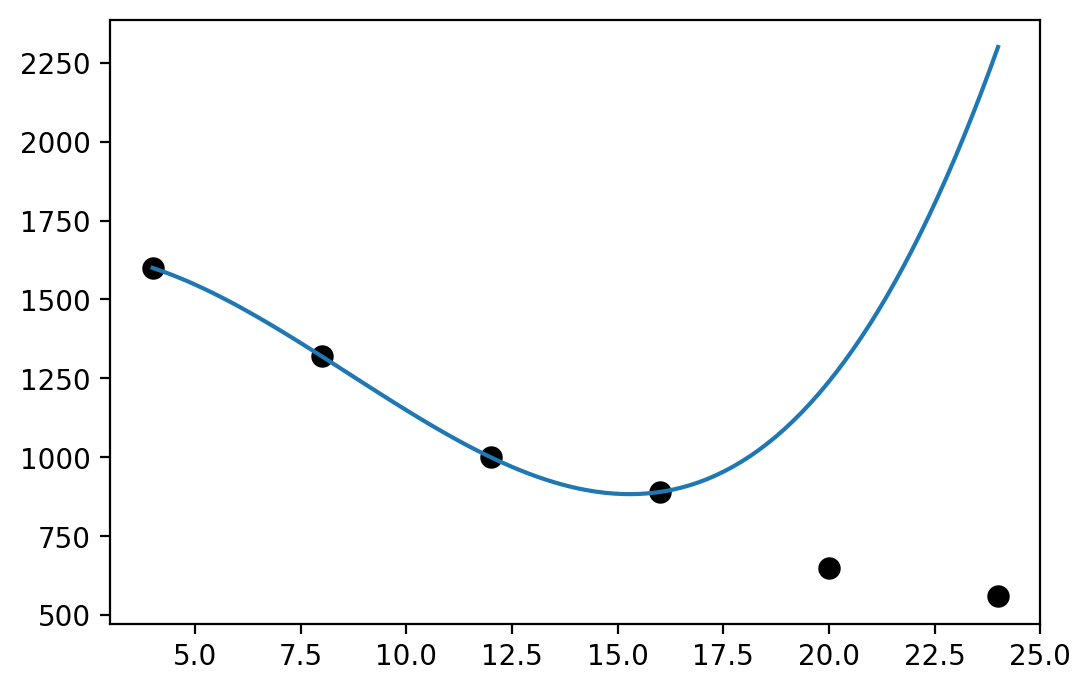

In [ ]:
from interpolacion_aproximacion import InterpolacionLagrange

li = InterpolacionLagrange()
li.fit(np.transpose(X),grado=3)
li.plot()


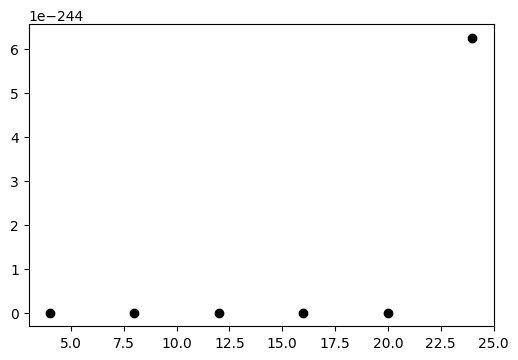

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[4,8,12,16,20,24],[1600,1320,1000,890,650,560]])

xmin = 4
xmax = 24
xaxis = np.linspace(xmin-1,xmax+1,num=50)
plt.figure(dpi=100)
plt.scatter(X[0,:],np.exp(-X[1,:]),color='black')
# plt.plot(xaxis,[lr2.eval(x) for x in xaxis],color='red')
plt.show()

In [ ]:
from scipy.stats import wasserstein_distance

wasserstein_distance([0, 0.5, 1], [0, 0.4, 0.4, 1])

0.11666666666666667

# Ejercicios examen

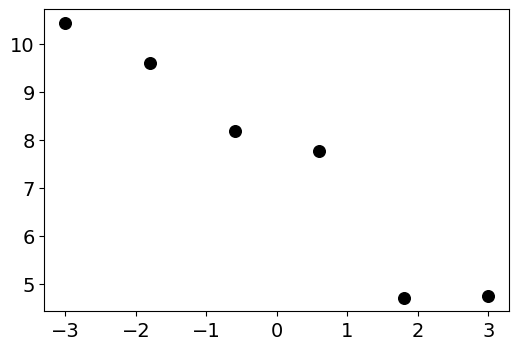

In [ ]:
from numpy.random.mtrand import seed
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: -(x**3)/6 + 7

np.random.seed(47)
xs = np.linspace(-3,3,num=6)
noise = np.random.normal(0,1.25,size=xs.shape)
ys = f(xs)+noise
datos = np.transpose(np.vstack((xs,ys)))

plt.figure(dpi=100)
plt.scatter(datos[:,0],datos[:,1],color='black',s=70)
plt.xticks([x-3 for x in range(7)],fontsize=14)
plt.yticks(list(range(5,11)),fontsize=14)
plt.show()

In [ ]:
for x,y in zip(xs,ys):
    print(f"{round(x,4)} & {round(y,4)} \\\\")

-3.0 & 10.44 \\
-1.8 & 9.6044 \\
-0.6 & 8.1913 \\
0.6 & 7.7645 \\
1.8 & 4.7096 \\
3.0 & 4.7472 \\


Error respecto al promedio: 28.949323062282584
Error cuadrático: 1.8237684805568968
S_r<S_t : True
Desviación estandar de los datos y_i: 2.406213750367269
Error estandar de la estimación: 0.6752348629471261
S_r<S_t : True
Coeficiente de determinación: 0.9370013427729147


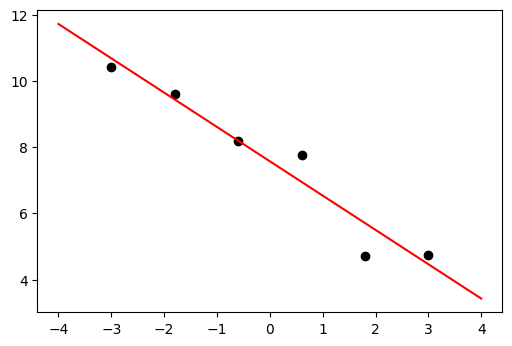

In [ ]:
from interpolacion_aproximacion import RegresionLineal

rl = RegresionLineal(grado=1)
rl.fit(datos)
rl.metrics()
rl.plot()

Error respecto al promedio: 28.949323062282584
Error cuadrático: 1.7660909971273833
S_r<S_t : True
Desviación estandar de los datos y_i: 2.406213750367269
Error estandar de la estimación: 0.767265924593593
S_r<S_t : True
Coeficiente de determinación: 0.9389937031229452


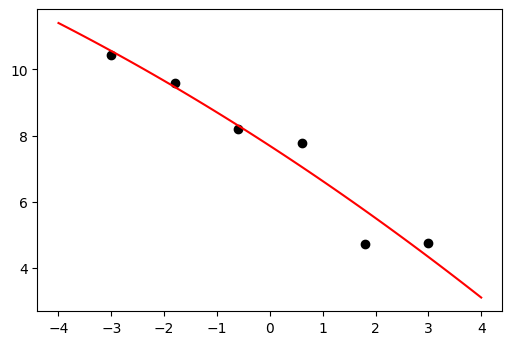

In [ ]:
rp = RegresionLineal(grado=2)
rp.fit(datos)
rp.metrics()
rp.plot()

# Tarea 4

## Ejercicio 1

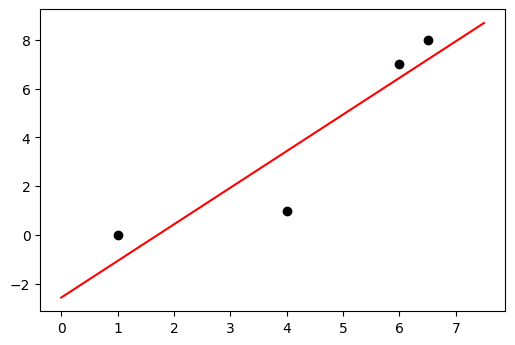

Error respecto al promedio: 50.0
Error cuadrático: 8.046822742474916
S_r<S_t : True
Desviación estandar de los datos y_i: 4.08248290463863
Error estandar de la estimación: 2.005844303837528
S_r<S_t : True
Coeficiente de determinación: 0.8390635451505016
Coeficientes: -2.5551839464882935, 1.4983277591973243
Evaluación en x=5: 4.936454849498328


In [7]:
from interpolacion_aproximacion import RegresionLineal
import numpy as np

datos = np.array([[1,0],[4,1],[6,7],[6.5,8]])

rl = RegresionLineal(grado=1)
rl.fit(datos)
rl.plot()
rl.metrics()
print(f"Coeficientes: {rl.a_0}, {rl.a_1}")
print(f"Evaluación en x=5: {rl.eval(5)}")

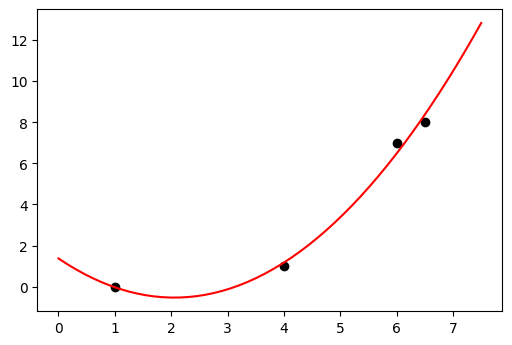

Error respecto al promedio: 50.0
Error cuadrático: 0.43798882681564144
S_r<S_t : True
Desviación estandar de los datos y_i: 4.08248290463863
Error estandar de la estimación: 0.6618072429458909
S_r<S_t : True
Coeficiente de determinación: 0.9912402234636872
Coeficientes: 1.3713966480447937, -1.8536312849161618, 0.4509497206703852
Evaluación en x=5: 3.3769832402236144


In [9]:
from interpolacion_aproximacion import RegresionLineal
import numpy as np

datos = np.array([[1,0],[4,1],[6,7],[6.5,8]])

rl = RegresionLineal(grado=2)
rl.fit(datos)
rl.plot()
rl.metrics()
print(f"Coeficientes: {rl.a_0}, {rl.a_1}, {rl.a_2}")
print(f"Evaluación en x=5: {rl.eval(5)}")

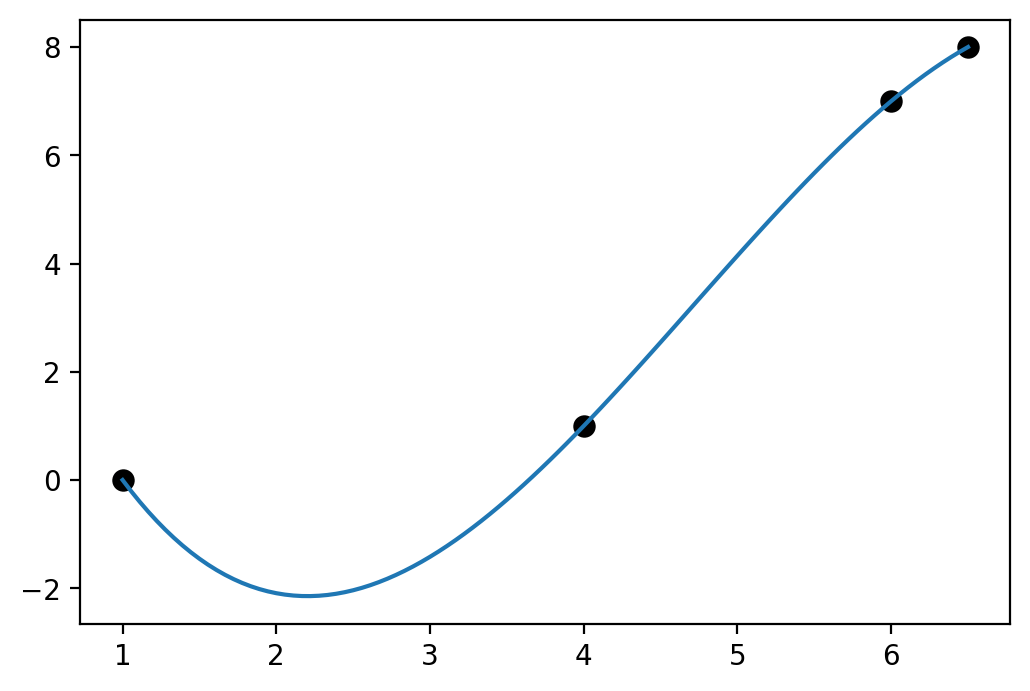

Evaluación en x=5: 4.145454545454547


In [16]:
from interpolacion_aproximacion import InterpolacionLagrange

lag = InterpolacionLagrange()
lag.fit(datos,grado=3)
lag.plot()
print(f"Evaluación en x=5: {lag.eval(5)}")

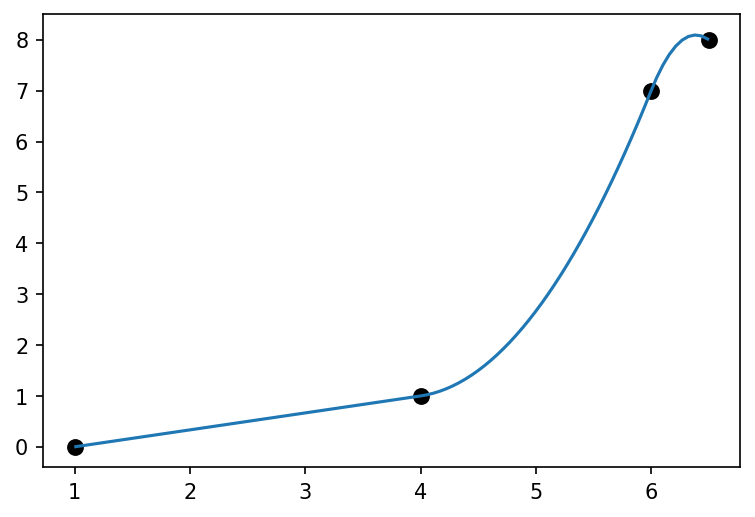

Evaluación en x=5: 2.666666666666668


In [17]:
from interpolacion_aproximacion import Splines

spl = Splines()
spl.fit(datos)
spl.plot()
print(f"Evaluación en x=5: {spl.eval(5)}")

## Ejercicio 2

In [19]:
xs = [0,8,16,24,32,40]
ys = [14.621,11.843,9.870,8.418,7.305,6.413]

datos = np.transpose(np.vstack((xs,ys)))
datos

array([[ 0.   , 14.621],
       [ 8.   , 11.843],
       [16.   ,  9.87 ],
       [24.   ,  8.418],
       [32.   ,  7.305],
       [40.   ,  6.413]])

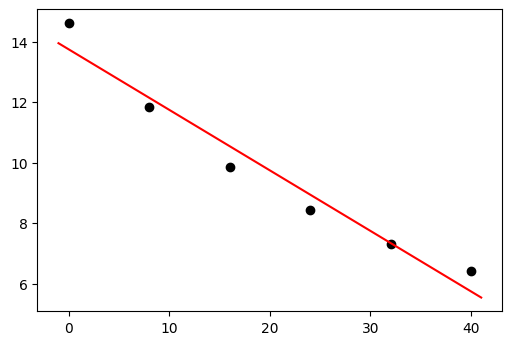

Error respecto al promedio: 47.009358000000006
Error cuadrático: 2.039597485714288
S_r<S_t : True
Desviación estandar de los datos y_i: 3.0662471524650456
Error estandar de la estimación: 0.7140723852863742
S_r<S_t : True
Coeficiente de determinación: 0.9566129474536902
Coeficientes: 13.752571428571427, -0.2003785714285714

Evaluación en x=27: 8.34235


In [22]:
rl = RegresionLineal(grado=1)
rl.fit(datos)
rl.plot()
rl.metrics()
print(f"Coeficientes: {rl.a_0}, {rl.a_1}")
print(f"\nEvaluación en x=27: {rl.eval(27)}")

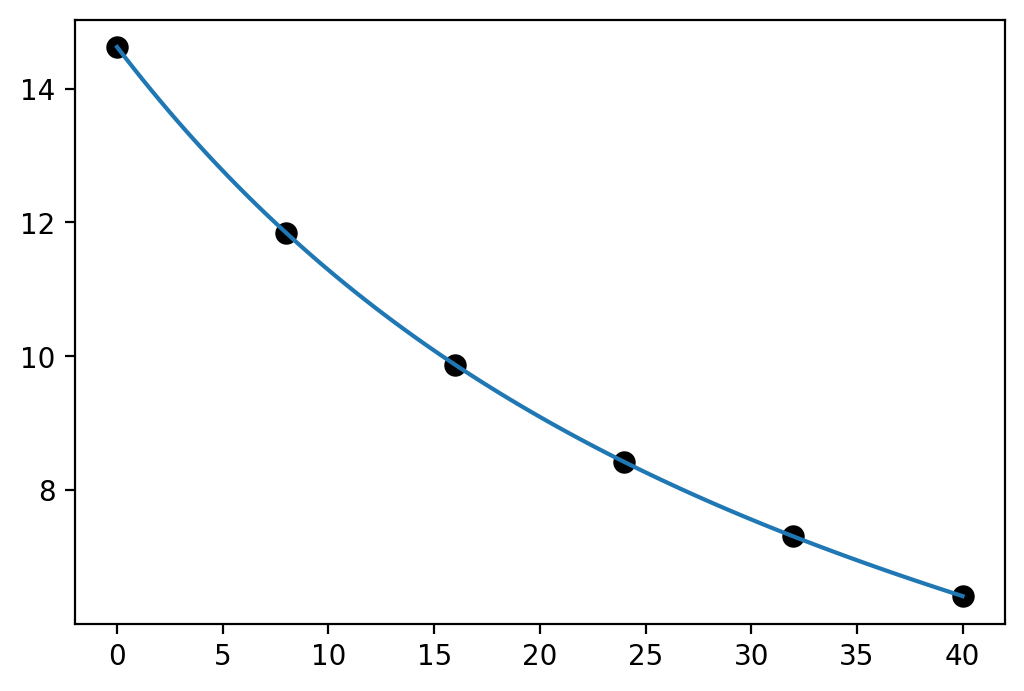

Evaluación en x=27: 7.968238960266113


In [23]:
from interpolacion_aproximacion import InterpolacionLagrange

lag = InterpolacionLagrange()
lag.fit(datos,grado=5)
lag.plot()
print(f"Evaluación en x=27: {lag.eval(27)}")

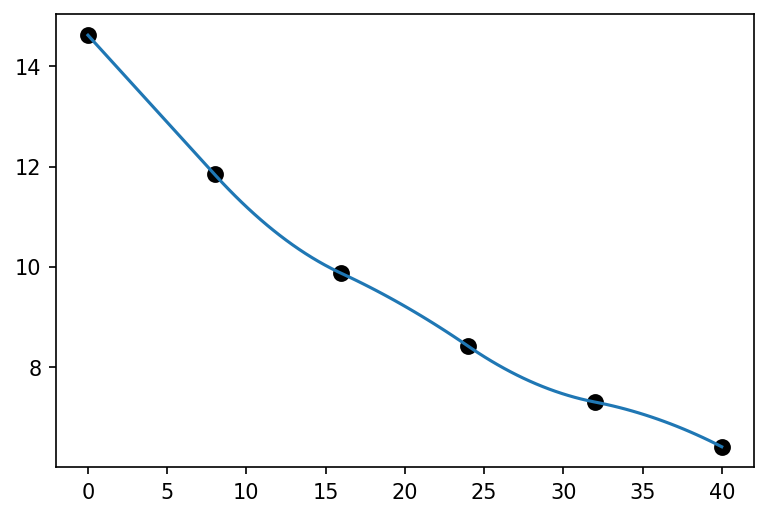

Evaluación en x=27: 7.854609375000191


In [24]:
from interpolacion_aproximacion import Splines

spl = Splines()
spl.fit(datos)
spl.plot()
print(f"Evaluación en x=27: {spl.eval(27)}")